In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
#Stop Words
!gdown --id 1rgoshfz_7xuS3HwE2vM-F-G0TI_O5kgg

StopWords = open('/content/StopWords.txt',"r").read().split('\n')
print(StopWords)

Downloading...
From: https://drive.google.com/uc?id=1rgoshfz_7xuS3HwE2vM-F-G0TI_O5kgg
To: /content/StopWords.txt
100% 5.21k/5.21k [00:00<00:00, 9.70MB/s]
['অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', ' ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'ক

In [ ]:
!gdown --id 1h71URr5OdG_q0CbOGiT3Uku83zRwwbsE
data = pd.read_csv('/content/headlines2.csv',encoding='utf-8')
data

Downloading...
From: https://drive.google.com/uc?id=1h71URr5OdG_q0CbOGiT3Uku83zRwwbsE
To: /content/headlines2.csv
100% 14.6M/14.6M [00:00<00:00, 61.8MB/s]


,headline,category,newspaper name
0,মাদারীপুরে নদীতে গোসল করতে গিয়ে শিশুর মৃত্যু,bangladesh,BDProtidin
1,আখাউড়া ইমিগ্রেশন দিয়ে ভারত থেকে আগত ১৪ যাত্রী ...,bangladesh,BDProtidin
2,অবৈধ বিক্রি বন্ধে বালুর স্তুপ নিলামে তুললেন ইউএনও,bangladesh,BDProtidin
3,"গরু চুরির অভিযোগে যুবককে নির্যাতন, ইউপি সদস্য ...",bangladesh,BDProtidin
4,নন্দীগ্রামে খালেদা জিয়ার রোগমুক্তি কামনায় মসজি...,bangladesh,BDProtidin
...,...,...,...
103868,ব্লকচেইন নিয়ে সেমিনার করল বিসিএস,it,jugantor
103869,উবারের দক্ষিণ এশিয়ার প্রেসিডেন্ট হলেন প্রভজিৎ সিং,it,jugantor
103870,এই ঈদে বিরাট হাট বসছে ‘দেশীগরু বিডিডটকমে’,it,jugantor
103871,প্রবাসীরাও পশু অর্ডার করতে পারবেন অনলাইন হাটে,it,jugantor


Total number of headlines: 103873


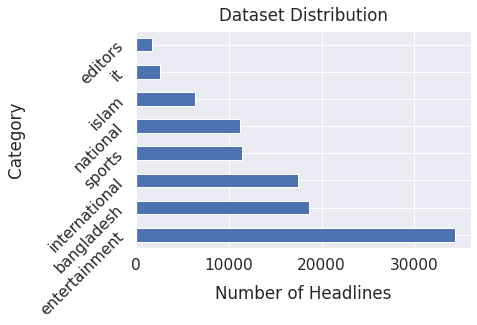

In [ ]:
print(f'Total number of headlines: {len(data)}')
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Headlines", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
data.columns

Index(['headline', 'category', 'newspaper name'], dtype='object')

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      '''ans = ""
      for item in headlines.split():
       if item in StopWords or item=="":
         continue
       ans+= item+" "
      return ans.lstrip()'''
      return headlines
# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(cleaning_data)

# print some cleaned reviews from the dataset
sample_data = [2000,5000,10000,20000,30000,35000,40000,45000,50000,60000,65000,70000,75000,80000,100000]
for i in sample_data:
  print('Original: ',data.headline[i],'\nCleaned:',
           data.cleaned[i],'\n','Category:--> ',data.category[i],'\n')

Original:  পদ্মায় ১৪ কেজির রুই, দাম ৩৫ হাজার ৭৫০! 
Cleaned: পদ্মায় ১৪ কেজির রুই  দাম ৩৫ হাজার ৭৫০  
 Category:-->  bangladesh 

Original:  বাংলাদেশের পাখি  
Cleaned: বাংলাদেশের পাখি  
 Category:-->  editors 

Original:  মানবপাচার রোধে বাংলাদেশের জিরো টলারেন্স নীতি গ্রহণ 
Cleaned: মানবপাচার রোধে বাংলাদেশের জিরো টলারেন্স নীতি গ্রহণ 
 Category:-->  international 

Original:  বগুড়ার সংঘর্ষে সাংবাদিকসহ আহত ৭ 
Cleaned: বগুড়ার সংঘর্ষে সাংবাদিকসহ আহত ৭ 
 Category:-->  bangladesh 

Original:  স্ত্রী-সন্তানসহ করোনায় আক্রান্ত আজিজুল হাকিম 
Cleaned: স্ত্রী সন্তানসহ করোনায় আক্রান্ত আজিজুল হাকিম 
 Category:-->  entertainment 

Original:  ৭০ জন পুলিশ সদস্যকে নিজের হাতে রান্না করে খাওয়ালেন নিপুণ! 
Cleaned: ৭০ জন পুলিশ সদস্যকে নিজের হাতে রান্না করে খাওয়ালেন নিপুণ  
 Category:-->  entertainment 

Original:  সিনেমায় চুমুর দৃশ্য, বিয়ে ভাঙলো নায়িকার 
Cleaned: সিনেমায় চুমুর দৃশ্য  বিয়ে ভাঙলো নায়িকার 
 Category:-->  entertainment 

Original:  দ্বিতীয় মৌসুম নিয়ে ফিরছে ‘স্যাক্রেড গেইমস’ 
Cleaned: দ্বিতীয় মৌসুম

In [ ]:
# Length of each headlines
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the headlines with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(data)-len(dataset)),
      "\nTotal Headlines:",len(dataset))

After Cleaning: 
Removed 1247 Small Headlines 
Total Headlines: 102626


In [ ]:

def data_summary(dataset):

    """
    This function will print the summary of the headlines and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  entertainment
Number of Documents:33717
Number of Words:213598
Number of Unique Words:19121
Most Frequent Words:

নতুন	2588
নিয়ে	2288
ও	1802
গান	1381
খান	1074
না	1015
র	1012
নাটক	890
মুক্তি	844
চলচ্চিত্র	838

Class Name :  bangladesh
Number of Documents:18665
Number of Words:131368
Number of Unique Words:14722
Most Frequent Words:

মৃত্যু	1126
নিহত	1041
গ্রেফতার	976
আটক	891
ও	830
২	686
লাশ	671
উদ্ধার	659
থেকে	622
আহত	615

Class Name :  international
Number of Documents:17440
Number of Words:121582
Number of Unique Words:12032
Most Frequent Words:

মৃত্যু	2260
করোনা	1883
করোনায়	1337
জনের	1082
ভারতের	1071
লাখ	1066
রোগী	1041
ভারতে	955
মার্কিন	883
ও	870

Class Name :  sports
Number of Documents:11438
Number of Words:67922
Number of Unique Words:9048
Most Frequent Words:

না	671
জয়	563
বাংলাদেশের	544
লিগ	499
তিন	478
ছাড়িয়ে	463
চিঠি	434
ক্লাবের	433
বাফুফেকে	426
অষ্টম	426

Class Name :  national
Number of Documents:10800
Number of Words:66501
Number of Unique Words:12049
Most F

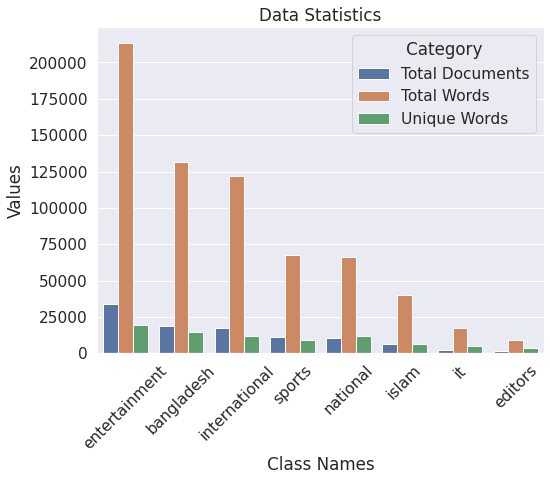

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

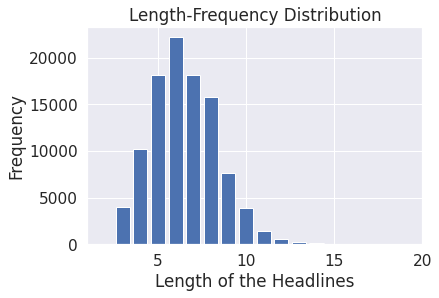

Maximum Length of a headline: 19
Minimum Length of a headline: 3
Average Length of a headline: 7.0


In [ ]:
dataset['HeadlineLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.HeadlineLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 20)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Headlines')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a headline: {max(dataset.HeadlineLength)}")
print(f"Minimum Length of a headline: {min(dataset.HeadlineLength)}")
print(f"Average Length of a headline: {round(np.mean(dataset.HeadlineLength),0)}")

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        category: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #===========================================================

def dataset_split(headlines,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector .

    Args:
        headlines: sequenced headlines
        category: encoded lables (array)

    Returns:
        X_train: training data
        X_valid: validation data
        X_test : testing feature vector
        y_train: training encoded labels (array)
        y_valid: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print(color.BOLD+"\nDataset Distribution:\n"+color.END)
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
labels = label_encoding(dataset.category,True)



			===== Label Encoding ===== 
Class Names:--> ['bangladesh' 'editors' 'entertainment' 'international' 'islam' 'it'
 'national' 'sports']
bangladesh   0 

entertainment   2 

international   3 

bangladesh   0 

entertainment   2 

entertainment   2 

entertainment   2 

entertainment   2 

entertainment   2 

international   3 

islam   4 

national   6 

sports   7 

bangladesh   0 

sports   7 



In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(dataset.cleaned,labels)



Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 102626 
	Training		 73890 
	Test			 10263 
	Validation		 18473


In [ ]:
vocab_size = 57000
embedding_dim = 128
max_length = 21
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def padded_headlines(original,encoded,padded):
  '''
  print the samples padded headlines
  '''
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(original,"\n",encoded)
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,original,"\n",padded)

In [ ]:
#Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
#============================== Tokenizer Info =================================
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)
  #=============================== Print all the information =========================
print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

			====== Tokenizer Info ======
Words --> Counts:
ও 	 3420
নিয়ে 	 2955
নতুন 	 2752
মৃত্যু 	 2749
না 	 2577
করোনা 	 2416
করোনায় 	 1728
থেকে 	 1621
নিহত 	 1603
করে 	 1578

Words --> Documents:
ও 	 3397
নিয়ে 	 2948
মৃত্যু 	 2746
নতুন 	 2729
না 	 2524
করোনা 	 2413
করোনায় 	 1728
থেকে 	 1620
নিহত 	 1603
করে 	 1569

Words --> Index:
মুলতানকে 	 39213
কথামতো 	 39212
আথিয়া 	 39211
পরাবেন 	 39210
প্রিয়ন্তি 	 39209
কূটনীতিকরাও 	 39208
গাছচাপায় 	 39207
চাষাবাদে 	 39206
রাসায়নিকনির্ভর 	 39205
উরুগুয়ে 	 39204

Total Documents --> 73890
Found 39213 unique tokens


In [ ]:
padded_headlines(X_train[10],train_sequences[10],train_padded[10])



			====== Encoded Sequences ====== 

শেরপুরে কর্মহীন মানুষের মাঝে খাবার বিতরণ 
 [46, 37, 111, 110, 18, 17, 7, 39]

			====== Paded Sequences ======
 শেরপুরে কর্মহীন মানুষের মাঝে খাবার বিতরণ 
 [ 46  37 111 110  18  17   7  39   0   0   0   0   0   0   0   0   0   0
   0   0   0]


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)
#padded_headlines(X_valid[71695],validation_sequences[1],validation_padded[1])

In [ ]:
X_test

63818       গণত্রাণ বিতরণ কেন্দ্রে পরিণত তুরস্কে মসজিদগুলো
58710                      অক্সিজেন দিন  আকুতি কেজরিওয়ালের
14069               এবার বন্ধ হচ্ছে গুগল প্লে আর্টিস্ট হাব
57333         ঘোষণা দিয়ে ২২ জনকে আক্রান্ত করলেন করোনা রোগী
12585    অনিয়মের অভিযোগে চার হজ এজেন্সিকে কারণ দর্শানোর...
                               ...                        
69845    করোনায় ভারত ইংল্যান্ড খেলা হলে আগুন লাগিয়ে দেও...
5107     ছোটবেলায় যেটার ভক্ত ছিলাম  এখন সেটার শুভেচ্ছা ...
50482    চলচ্চিত্রে ক্যারিয়ারের ব্যাপারে নিশ্চিত ছিলেন ...
95776              ঈদগাহে নয়  মসজিদেই হবে ঈদুল আজহার জামাত
52566                আঁখি আলমগীরের গানের বাইরের জগৎটা যেমন
Name: cleaned, Length: 10263, dtype: object

In [ ]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_test[5107],test_sequences[100],test_padded[100])


			====== Encoded Sequences ====== 

ছোটবেলায় যেটার ভক্ত ছিলাম  এখন সেটার শুভেচ্ছা দূত   পরীমণি 
 [427, 30890, 15477, 15478]

			====== Paded Sequences ======
 ছোটবেলায় যেটার ভক্ত ছিলাম  এখন সেটার শুভেচ্ছা দূত   পরীমণি 
 [  427 30890 15477 15478     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0]


In [ ]:
# Labels Tokenization
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(dataset.category)

train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

#print(train_label_seq.shape)
#print(valid_label_seq.shape)
#print(testing_label_seq.shape)

In [ ]:
## gru model

keras.backend.clear_session()
accuracy_threshold = 0.97
vocab_size = 57000
embedding_dim = 128
max_length = 21
num_category = 8

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath ="Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 128)           7296000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              74496     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
Total params: 7,373,792
Trainable params: 7,373,792
Non-trainable params: 0
______________________________________________

In [ ]:
num_epochs = 10
batch = 32
history = model.fit(train_padded, train_label_seq,
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq),
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
2308/2310 [============================>.] - ETA: 0s - loss: 0.7254 - accuracy: 0.7566
Epoch 1: val_accuracy improved from -inf to 0.84491, saving model to Model.h5
2310/2310 [==============================] - 51s 20ms/step - loss: 0.7252 - accuracy: 0.7567 - val_loss: 0.4770 - val_accuracy: 0.8449
Epoch 2/10
2308/2310 [============================>.] - ETA: 0s - loss: 0.3013 - accuracy: 0.9017
Epoch 2: val_accuracy improved from 0.84491 to 0.87349, saving model to Model.h5
2310/2310 [==============================] - 46s 20ms/step - loss: 0.3013 - accuracy: 0.9017 - val_loss: 0.4004 - val_accuracy: 0.8735
Epoch 3/10
2310/2310 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9511
Epoch 3: val_accuracy improved from 0.87349 to 0.87447, saving model to Model.h5
2310/2310 [==============================] - 51s 22ms/step - loss: 0.1511 - accuracy: 0.9511 - val_loss: 0.4376 - val_accuracy: 0.8745
Epoch 4/10
2308/2310 [============================>.] - ETA: 

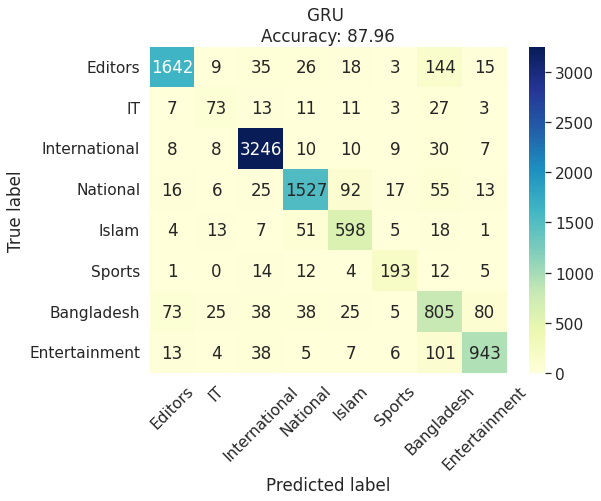

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory
## model.h5 - gru
## model.h6 -lstm



model = load_model("Model.h5")

predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(testing_label_seq, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,

                     index = ['Editors' ,'IT' ,'International', 'National', 'Islam', 'Sports', 'Bangladesh', 'Entertainment'],
                     columns = ['Editors' ,'IT' ,'International', 'National', 'Islam', 'Sports', 'Bangladesh', 'Entertainment'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('GRU \nAccuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Editors','1':'IT','2':'International','3':'National','4':'Islam','5':'Sports', '6':'Bangladesh', '7': 'Entertainment'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Editors,93.08,86.79,89.82,1892.000000
IT,52.90,49.32,51.05,148.000000
International,95.02,97.54,96.26,3328.000000
National,90.89,87.21,89.01,1751.000000
Islam,78.17,85.80,81.81,697.000000
Sports,80.08,80.08,80.08,241.000000
Bangladesh,67.53,73.92,70.58,1089.000000
Entertainment,88.38,84.42,86.36,1117.000000
accuracy,87.96,87.96,87.96,0.879567
macro avg,80.76,80.63,80.62,10263.000000
